In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import nltk
import numpy as np
import pandas as pd
import random

In [2]:
pet_analysis = pd.read_csv('pet_analysis.csv')
pet_analysis.dropna(subset=['Description'], inplace=True) #removing blank entries

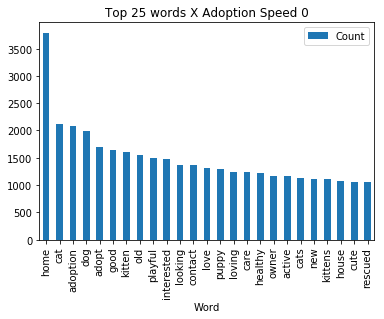

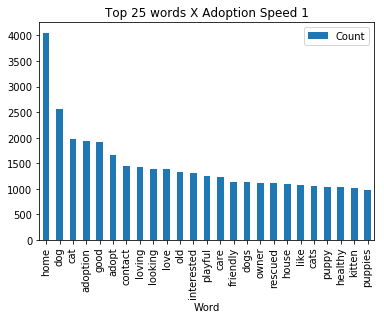

In [3]:
def get_top_n_words(corpus, n=None):
    """
    List the top n words in a vocabulary according to occurrence in a text corpus.
    """
    vec = CountVectorizer(
            strip_accents='unicode',
            analyzer='word',
            token_pattern=r'\w{3,}', # vectorize 3-character words or more
            stop_words='english',
            ngram_range=(1, 2),
            max_features=30000
        ).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

words_count_by_adoption_speed = []
for adoption_speed in range(2):
    descriptions_by_adoption_speed = pet_analysis[pet_analysis.AdoptionSpeed == adoption_speed].Description
    top_words = get_top_n_words(descriptions_by_adoption_speed, 25)
    words_count_by_adoption_speed.append(pd.DataFrame(top_words, columns = ['Word', 'Count'])) 
    words_count_by_adoption_speed[adoption_speed].plot.bar(x='Word',y='Count',title="Top 25 words X Adoption Speed " + str(adoption_speed))